In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('GS')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-04,76.000000,77.250000,70.000000,70.375000,51.739826,22320900
1999-05-05,69.875000,69.875000,66.250000,69.125000,50.820839,7565700
1999-05-06,68.000000,69.375000,67.062500,67.937500,49.947781,2905700
1999-05-07,67.937500,74.875000,66.750000,74.125000,54.496853,4862300
1999-05-10,73.375000,73.500000,70.250000,70.687500,51.969616,2589400
...,...,...,...,...,...,...
2023-06-01,324.510010,324.679993,314.019989,316.399994,316.399994,3339700
2023-06-02,318.239990,325.269989,317.049988,323.649994,323.649994,3987700
2023-06-05,322.929993,323.489990,320.320007,321.809998,321.809998,1462900


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

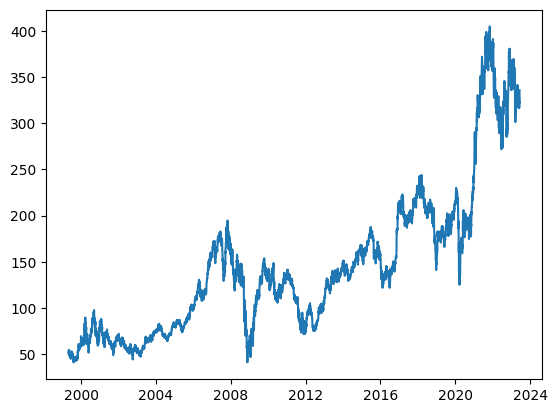

In [ ]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
# Train test split
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

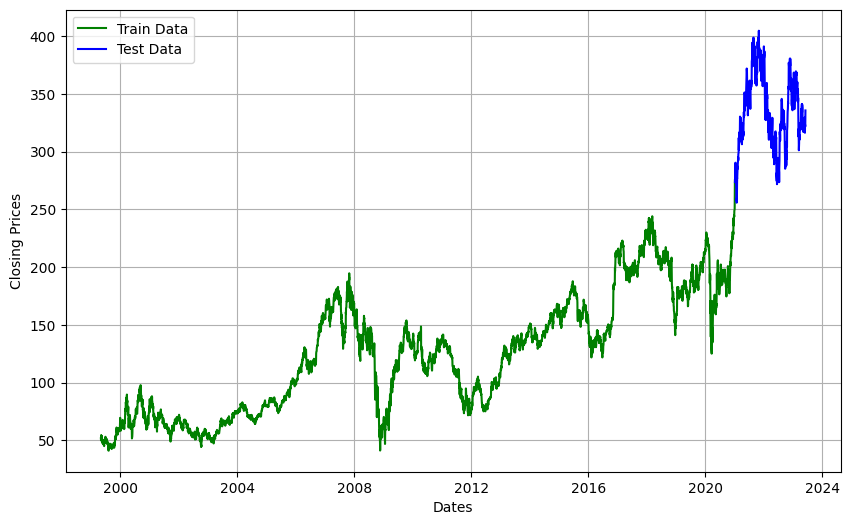

In [ ]:
# Split dta into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test Data')
plt.legend()

In [ ]:
model_predictions = []
n_test_obser = len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order=(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output)[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  # print(output)
  # break

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6063
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -15423.334
Date:                Wed, 07 Jun 2023   AIC                          30856.668
Time:                        23:59:27   BIC                          30890.217
Sample:                             0   HQIC                         30868.313
                               - 6063                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0148      0.007     -2.147      0.032      -0.028      -0.001
ar.L2          0.0137      0.007      1.843      0.065      -0.001       0.028
ar.L3         -0.0046      0.008     -0.607      0.5

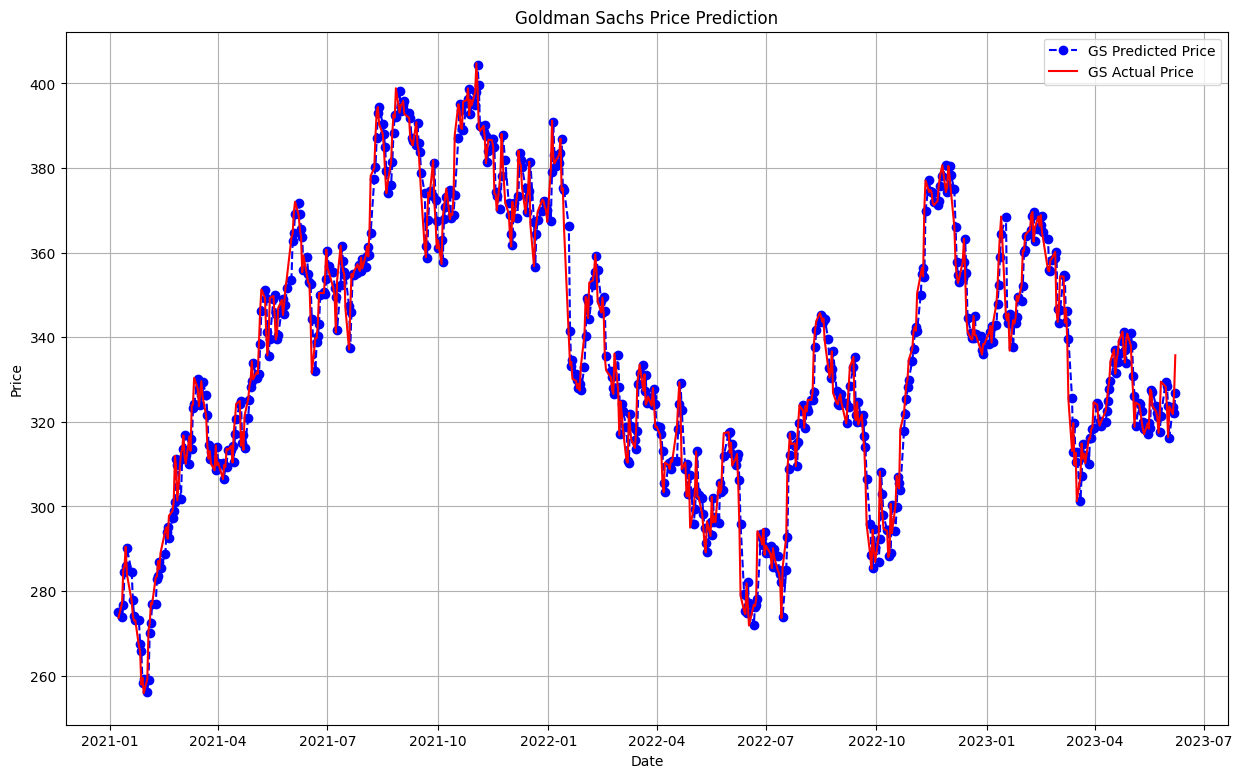

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range=df[to_row:].index

plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='GS Predicted Price')
plt.plot(date_range, testing_data, color='red', label='GS Actual Price')

plt.title('Goldman Sachs Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Report performance: Mean Absolute Percentage Error
mape=(np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data)))*100
print('MAPE: ' + str(round(mape, 2)) + '%')

MAPE: 1.32%
